In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm           
import statsmodels.formula.api as smf 
import multiprocessing
import random
from itertools import product

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use("bmh")                    
sns.set_style({"axes.grid":False}) 
%pip install plotly
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) 


Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings as wrn
wrn.filterwarnings("ignore", category = DeprecationWarning) 
wrn.filterwarnings("ignore", category = FutureWarning) 
wrn.filterwarnings("ignore", category = UserWarning) 

In [4]:

def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(
    x = x,
    y = y,
    marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= "closest", title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)


def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = "markers",
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= "closest", title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)    
    

def plot_histogram(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode= "closest" , title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

In [5]:
url = "https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/SaratogaHouses.csv"
datos = pd.read_csv(url, sep = ",")

In [6]:
datos.head(3)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No


In [7]:
datos.tail(3)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No
1727,111300,0.59,86,26000,1959,51,3,0,1.0,6,hot air,gas,septic,No,No,No


In [8]:
datos.shape

(1728, 16)

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [10]:
datos.columns.values

array(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel',
       'sewer', 'waterfront', 'newConstruction', 'centralAir'],
      dtype=object)

In [11]:
datos.dtypes.value_counts()

int64      8
object     6
float64    2
dtype: int64

In [12]:
datos.isnull().any().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [13]:
valores_categoricos = datos.select_dtypes(include = ["object"])
valores_categoricos.columns.values

array(['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction',
       'centralAir'], dtype=object)

In [14]:
# Variables Cualitativas o categoricas
datos.select_dtypes(include=["object"]).describe()

,heating,fuel,sewer,waterfront,newConstruction,centralAir
count,1728,1728,1728,1728,1728,1728
unique,3,3,3,2,2,2
top,hot air,gas,public/commercial,No,No,No
freq,1121,1197,1213,1713,1647,1093


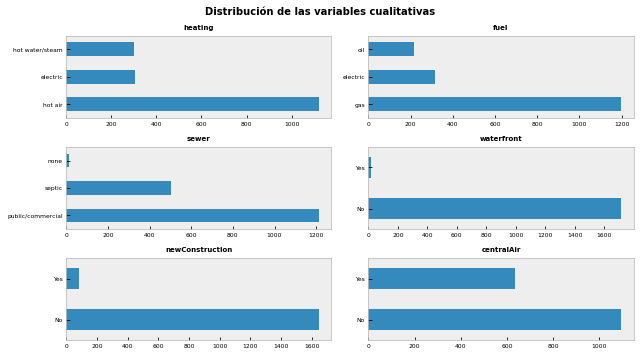

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 5))
axes = axes.flat
valores_categoricos = datos.select_dtypes(include=["object"]).columns

for i, colum in enumerate(valores_categoricos):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Distribución de las variables cualitativas",
             fontsize = 10, fontweight = "bold");

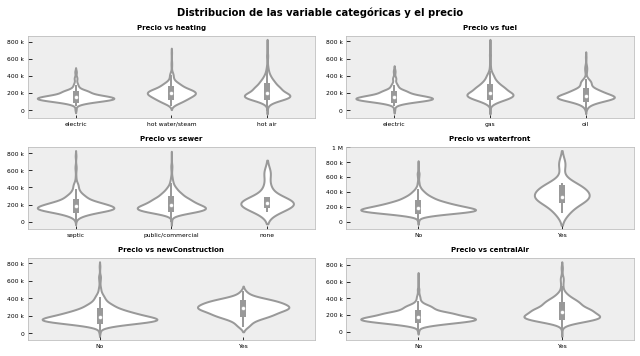

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 5))
axes = axes.flat
valores_categoricos = datos.select_dtypes(include=["object"]).columns

for i, colum in enumerate(valores_categoricos):
    sns.violinplot(
        x     = colum,
        y     = "price",
        data  = datos,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"Precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Distribucion de las variable categóricas y el precio", fontsize = 10, fontweight = "bold");

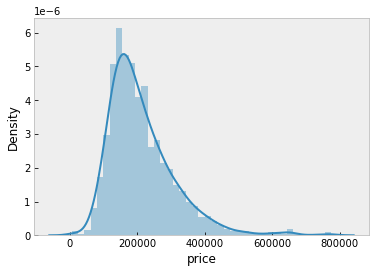

In [17]:
sns_plot = sns.distplot(datos["price"])

In [18]:
print("Skewness: %f" %datos["price"].skew())
print("Kurtosis: %f" %datos["price"].kurt())

Skewness: 1.577713
Kurtosis: 4.191532


In [19]:
valores_numericos = datos.select_dtypes(include = ["int64", "float64"])
valores_numericos.columns.values

array(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms'], dtype=object)

In [20]:
valores_numericos.head(3)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
0,132500,0.09,42,50000,906,35,2,1,1.0,5
1,181115,0.92,0,22300,1953,51,3,0,2.5,6
2,109000,0.19,133,7300,1944,51,4,1,1.0,8


In [21]:
valores_numericos.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


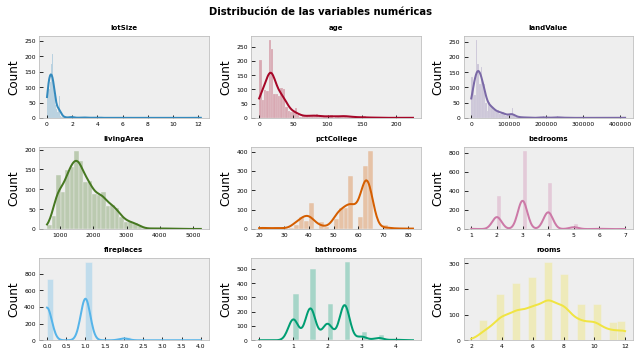

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
valores_numericos = datos.select_dtypes(include=["float64", "int"]).columns
valores_numericos = valores_numericos.drop('price')

for i, colum in enumerate(valores_numericos):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams["axes.prop_cycle"])*2)[i]["color"],
        line_kws= {"linewidth": 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle("Distribución de las variables numéricas", fontsize = 10, fontweight = "bold");

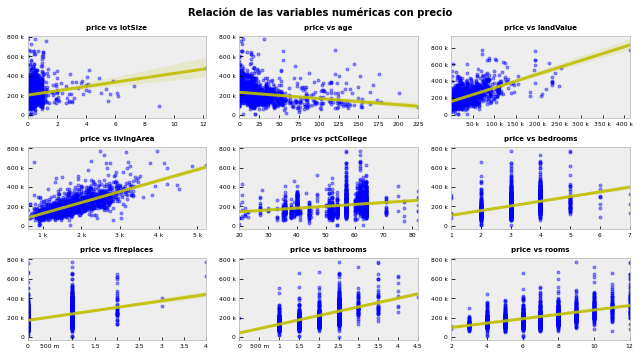

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
valores_numericos = datos.select_dtypes(include=["float64", "int"]).columns
valores_numericos = valores_numericos.drop("price")

for i, colum in enumerate(valores_numericos):
    sns.regplot(
        x           = datos[colum],
        y           = datos["price"],
        color       = "blue",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"y","alpha":0.9},
        ax          = axes[i]
    )
    axes[i].set_title(f"price vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Relación de las variables numéricas con precio", fontsize = 10, fontweight = "bold");

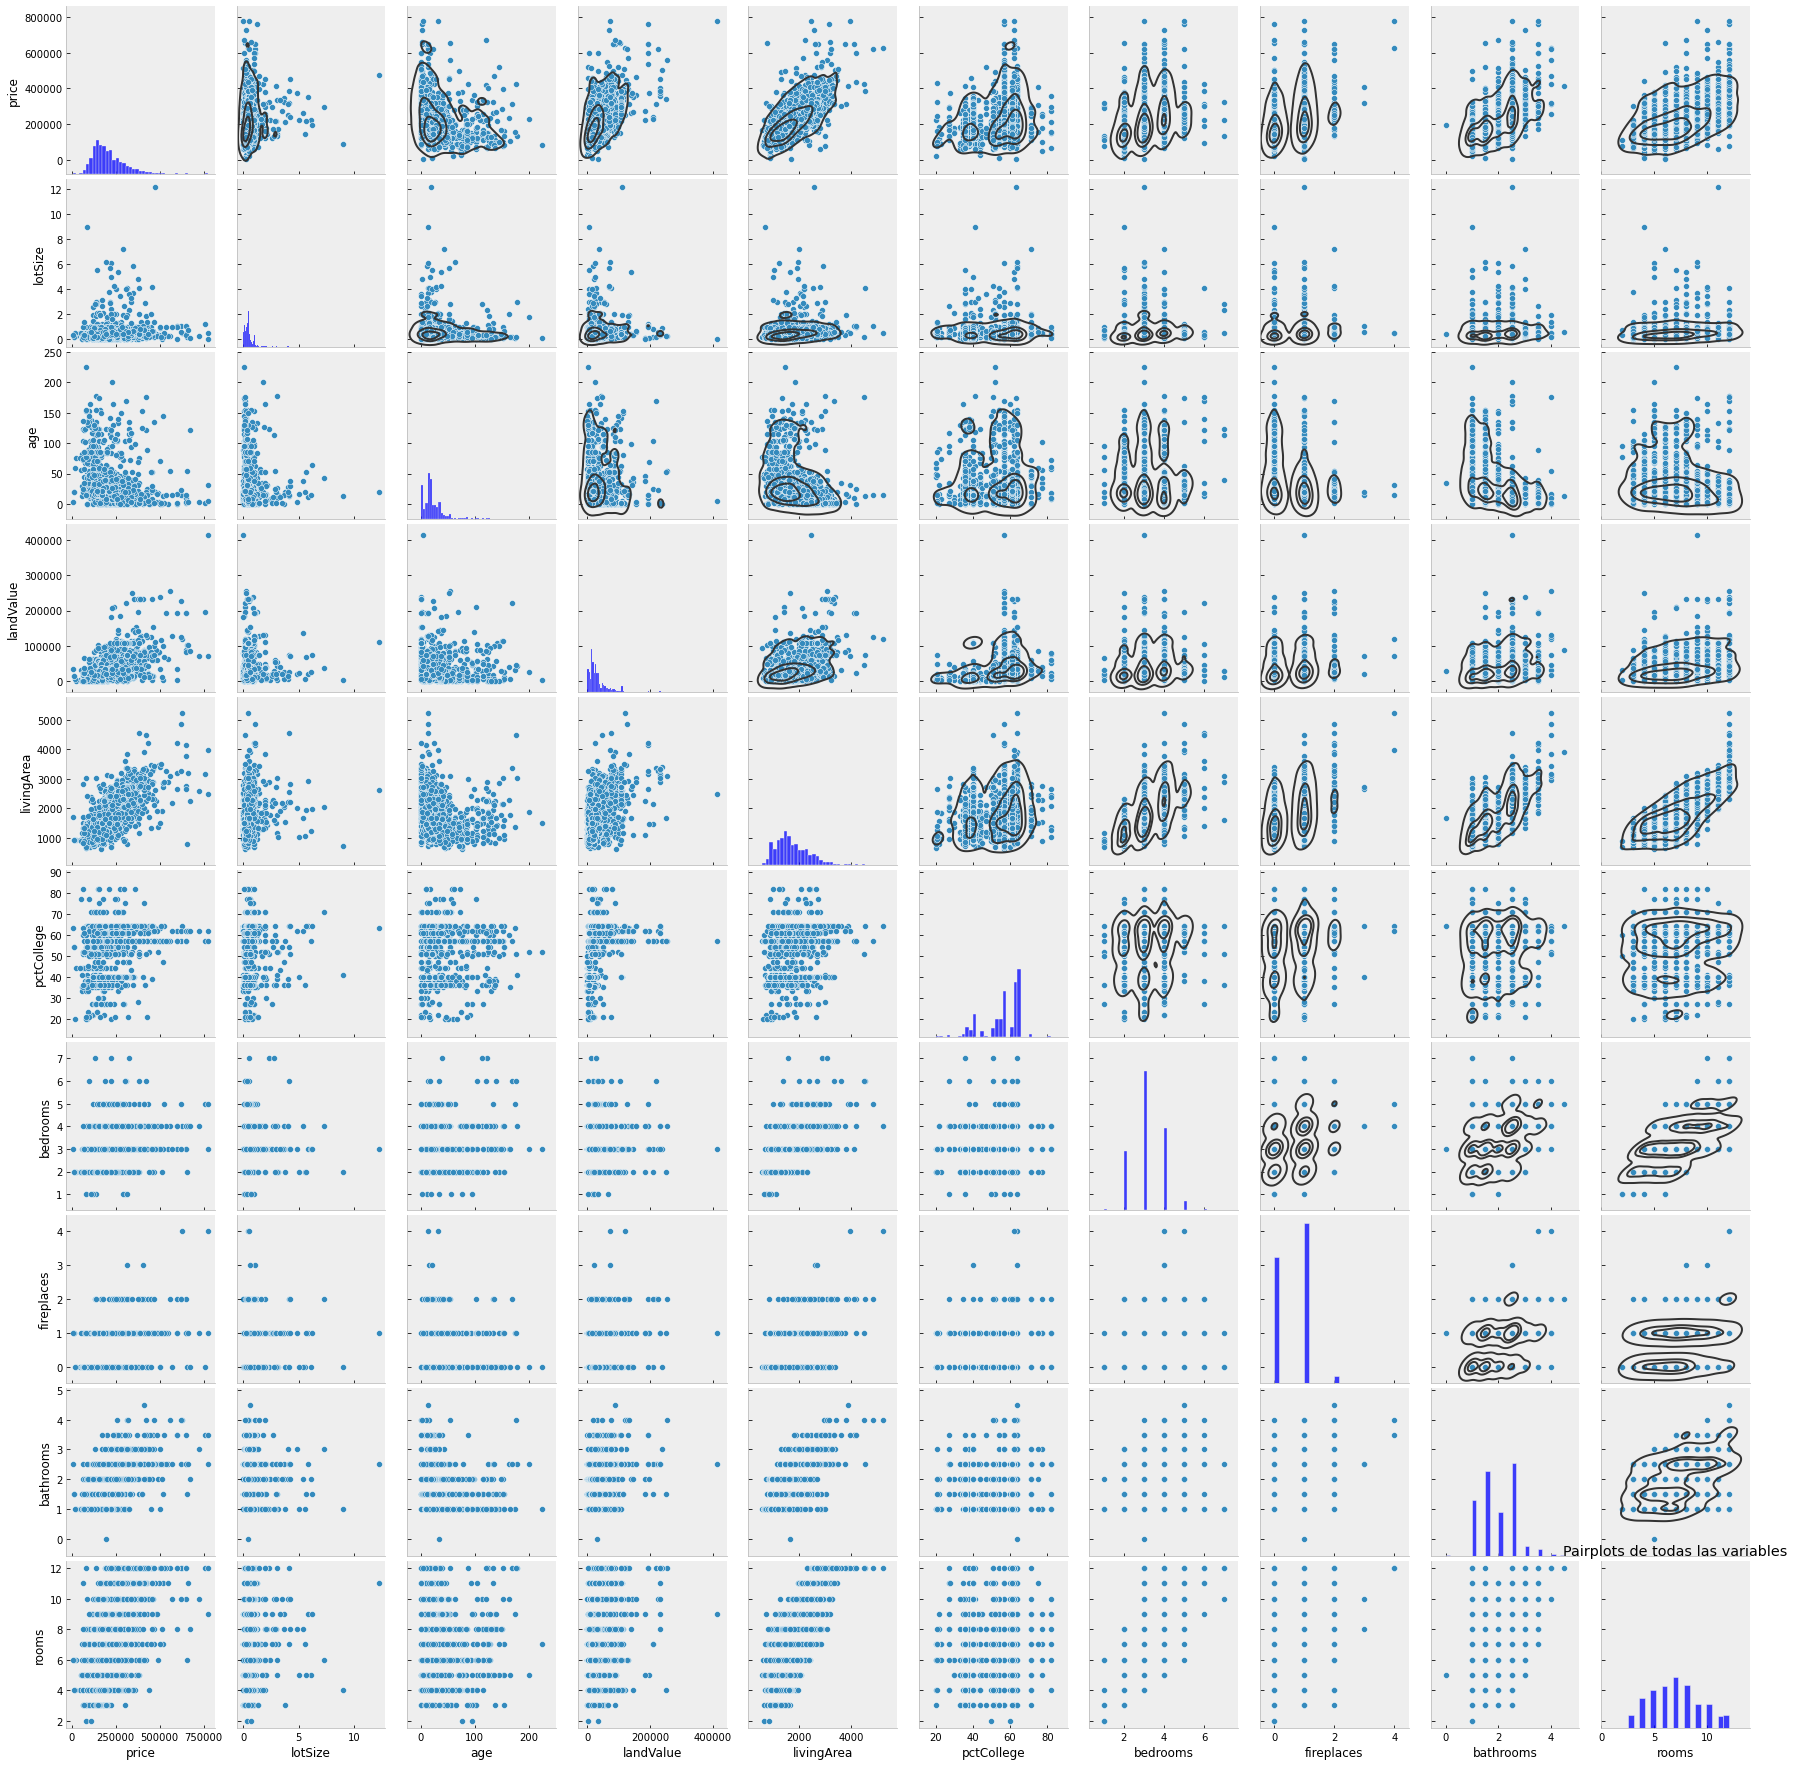

In [24]:
g = sns.pairplot(datos)
plt.title("Pairplots de todas las variables")
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [25]:
corr_matrix = datos.corr()

In [26]:
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
livingArea    0.712390
bathrooms     0.597250
landValue     0.581266
rooms         0.531170
bedrooms      0.400349
fireplaces    0.376786
pctCollege    0.200119
lotSize       0.158333
age          -0.188793
Name: price, dtype: float64

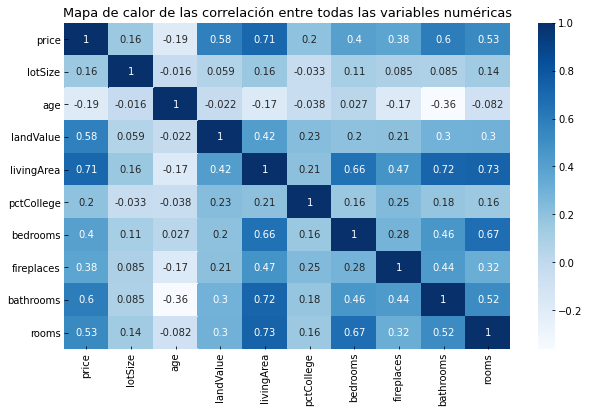

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(datos.corr(),cmap=plt.cm.Blues,annot=True)
plt.title("Mapa de calor de las correlación entre todas las variables numéricas",
         fontsize=13)
plt.show()

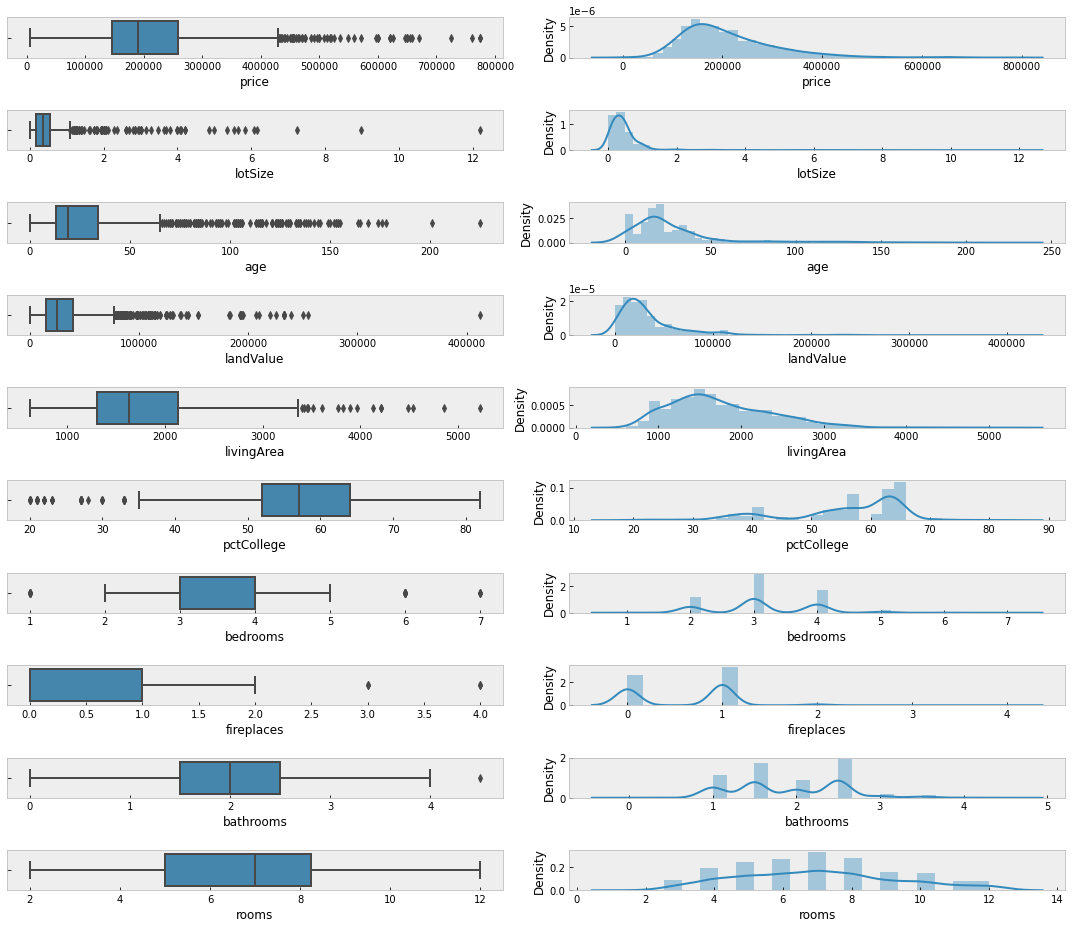

In [28]:
fig, ax = plt.subplots(10, 2, figsize = (15, 13))
sns.boxplot(x= datos["price"], ax = ax[0,0])
sns.distplot(datos["price"], ax = ax[0,1])
sns.boxplot(x= datos["lotSize"], ax = ax[1,0])
sns.distplot(datos["lotSize"], ax = ax[1,1])
sns.boxplot(x= datos["age"], ax = ax[2,0])
sns.distplot(datos["age"], ax = ax[2,1])
sns.boxplot(x= datos["landValue"], ax = ax[3,0])
sns.distplot(datos["landValue"], ax = ax[3,1])
sns.boxplot(x= datos["livingArea"], ax = ax[4,0])
sns.distplot(datos["livingArea"], ax = ax[4,1])
sns.boxplot(x= datos["pctCollege"], ax = ax[5,0])
sns.distplot(datos["pctCollege"], ax = ax[5,1])
sns.boxplot(x= datos["bedrooms"], ax = ax[6,0])
sns.distplot(datos["bedrooms"], ax = ax[6,1])
sns.boxplot(x= datos["fireplaces"], ax = ax[7,0])
sns.distplot(datos["fireplaces"], ax = ax[7,1])
sns.boxplot(x= datos["bathrooms"], ax = ax[8,0])
sns.distplot(datos["bathrooms"], ax = ax[8,1])
sns.boxplot(x= datos["rooms"], ax = ax[9,0])
sns.distplot(datos["rooms"], ax = ax[9,1])

plt.tight_layout()


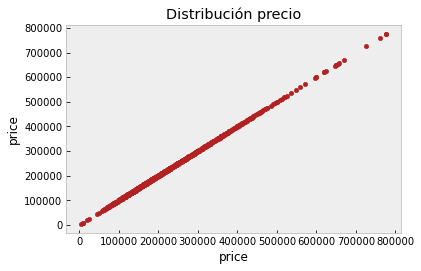

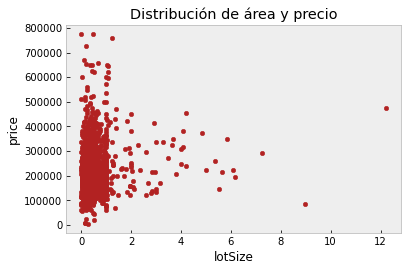

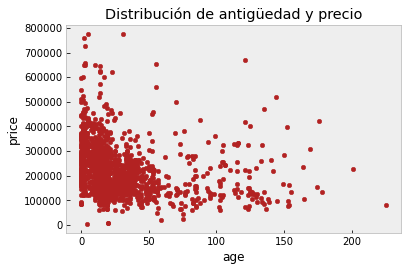

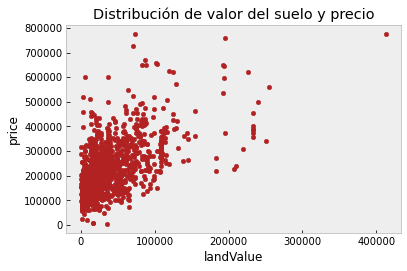

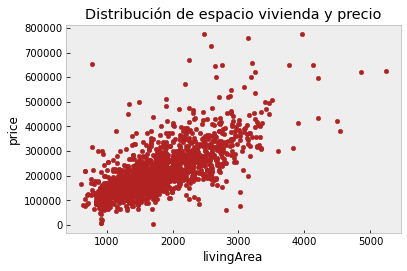

In [29]:

fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = "price",
    y    = "price",
    c    = "firebrick",
    kind = "scatter",
    ax   = ax
)
ax.set_title("Distribución precio");


fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = "lotSize",
    y    = "price",
    c    = "firebrick",
    kind = "scatter",
    ax   = ax
)
ax.set_title("Distribución de área y precio");


fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = "age",
    y    = "price",
    c    = "firebrick",
    kind = "scatter",
    ax   = ax
)
ax.set_title("Distribución de antigüedad y precio");


fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = "landValue",
    y    = "price",
    c    = "firebrick",
    kind = "scatter",
    ax   = ax
)
ax.set_title("Distribución de valor del suelo y precio");


fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = "livingArea",
    y    = "price",
    c    = "firebrick",
    kind = "scatter",
    ax   = ax
)
ax.set_title("Distribución de espacio vivienda y precio");

In [30]:
datos.drop(datos[datos.price>350000].index, inplace = True)
datos.reset_index(drop = True, inplace = True)

datos.drop(datos[datos.lotSize>1].index, inplace = True)
datos.reset_index(drop = True, inplace = True)

datos.drop(datos[datos.age>50].index, inplace = True)
datos.reset_index(drop = True, inplace = True)

datos.drop(datos[datos.landValue>55000].index, inplace = True)
datos.reset_index(drop = True, inplace = True)

datos.drop(datos[datos.livingArea>3100].index, inplace = True)
datos.reset_index(drop = True, inplace = True)

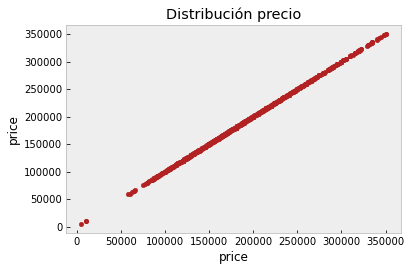

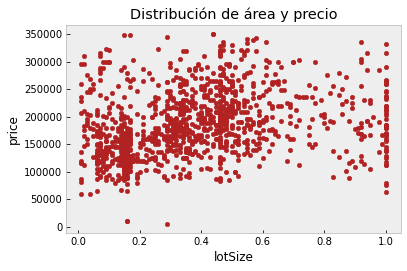

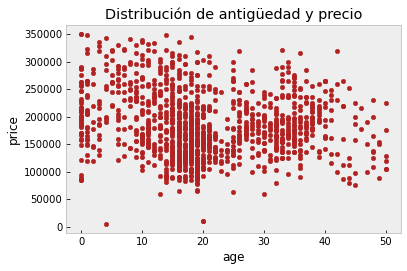

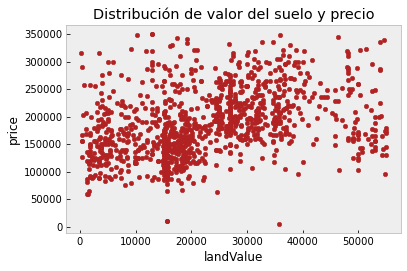

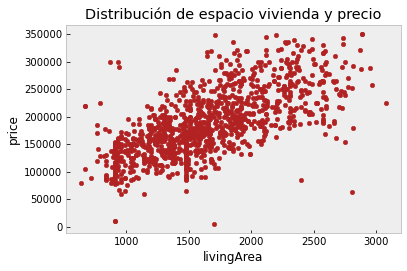

In [31]:

fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = "price",
    y    = "price",
    c    = "firebrick",
    kind = "scatter",
    ax   = ax
)
ax.set_title("Distribución precio");


fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = "lotSize",
    y    = "price",
    c    = "firebrick",
    kind = "scatter",
    ax   = ax
)
ax.set_title("Distribución de área y precio");


fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = "age",
    y    = "price",
    c    = "firebrick",
    kind = "scatter",
    ax   = ax
)
ax.set_title("Distribución de antigüedad y precio");


fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = "landValue",
    y    = "price",
    c    = "firebrick",
    kind = "scatter",
    ax   = ax
)
ax.set_title("Distribución de valor del suelo y precio");


fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = "livingArea",
    y    = "price",
    c    = "firebrick",
    kind = "scatter",
    ax   = ax
)
ax.set_title("Distribución de espacio vivienda y precio");


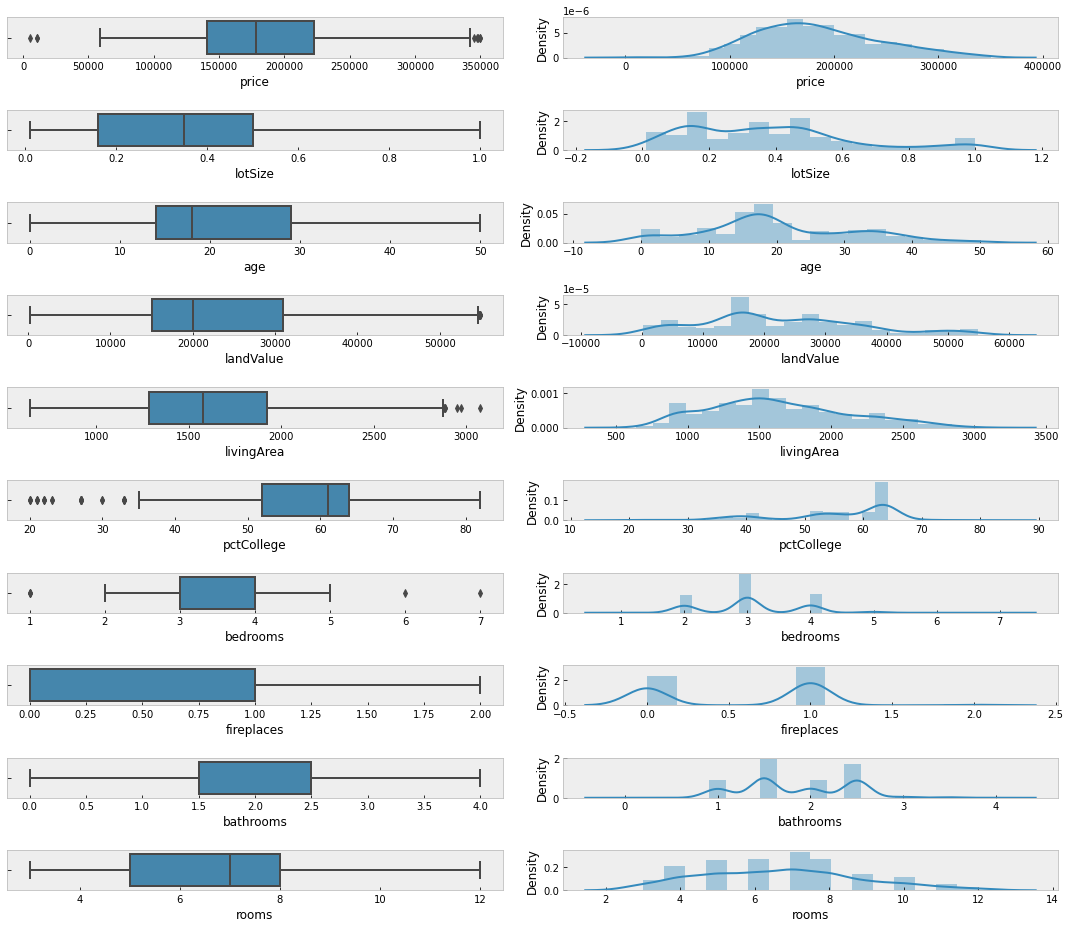

In [32]:
fig, ax = plt.subplots(10, 2, figsize = (15, 13))
sns.boxplot(x= datos["price"], ax = ax[0,0])
sns.distplot(datos["price"], ax = ax[0,1])
sns.boxplot(x= datos["lotSize"], ax = ax[1,0])
sns.distplot(datos["lotSize"], ax = ax[1,1])
sns.boxplot(x= datos["age"], ax = ax[2,0])
sns.distplot(datos["age"], ax = ax[2,1])
sns.boxplot(x= datos["landValue"], ax = ax[3,0])
sns.distplot(datos["landValue"], ax = ax[3,1])
sns.boxplot(x= datos["livingArea"], ax = ax[4,0])
sns.distplot(datos["livingArea"], ax = ax[4,1])
sns.boxplot(x= datos["pctCollege"], ax = ax[5,0])
sns.distplot(datos["pctCollege"], ax = ax[5,1])
sns.boxplot(x= datos["bedrooms"], ax = ax[6,0])
sns.distplot(datos["bedrooms"], ax = ax[6,1])
sns.boxplot(x= datos["fireplaces"], ax = ax[7,0])
sns.distplot(datos["fireplaces"], ax = ax[7,1])
sns.boxplot(x= datos["bathrooms"], ax = ax[8,0])
sns.distplot(datos["bathrooms"], ax = ax[8,1])
sns.boxplot(x= datos["rooms"], ax = ax[9,0])
sns.distplot(datos["rooms"], ax = ax[9,1])

plt.tight_layout()


In [33]:
datos.shape

(1185, 16)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop("price", axis = "columns"),
                                        datos["price"],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [35]:
print(y_train.describe())

count       948.000000
mean     185081.425105
std       59902.401155
min       10300.000000
25%      140718.500000
50%      177330.000000
75%      224925.000000
max      349900.000000
Name: price, dtype: float64


In [36]:
print(y_test.describe())

count       237.000000
mean     184578.219409
std       56679.159034
min        5000.000000
25%      142000.000000
50%      181500.000000
75%      220000.000000
max      321000.000000
Name: price, dtype: float64


In [37]:
print(X_train.describe())

          lotSize         age     landValue   livingArea  pctCollege  \
count  948.000000  948.000000    948.000000   948.000000  948.000000   
mean     0.378534   20.243671  22546.223629  1631.908228   55.630802   
std      0.249598   11.344966  12845.865798   496.812296   10.390719   
min      0.010000    0.000000    200.000000   640.000000   20.000000   
25%      0.160000   14.000000  15100.000000  1273.500000   52.000000   
50%      0.350000   18.000000  19600.000000  1561.000000   61.000000   
75%      0.500000   28.000000  30800.000000  1946.000000   64.000000   
max      1.000000   50.000000  54900.000000  3074.000000   82.000000   

         bedrooms  fireplaces   bathrooms       rooms  
count  948.000000  948.000000  948.000000  948.000000  
mean     3.070675    0.582278    1.854958    6.710970  
std      0.789493    0.518488    0.583391    2.135536  
min      1.000000    0.000000    0.000000    3.000000  
25%      3.000000    0.000000    1.500000    5.000000  
50%      3.0000

In [38]:
print(X_test.describe())

          lotSize         age     landValue  livingArea  pctCollege  \
count  237.000000  237.000000    237.000000   237.00000  237.000000   
mean     0.383207   20.864979  23130.379747  1641.78903   55.434599   
std      0.247574   11.077477  13363.547888   442.65069    9.935861   
min      0.010000    0.000000    300.000000   672.00000   23.000000   
25%      0.170000   13.000000  15000.000000  1348.00000   51.000000   
50%      0.350000   19.000000  22500.000000  1620.00000   60.000000   
75%      0.500000   29.000000  32000.000000  1896.00000   64.000000   
max      1.000000   50.000000  54900.000000  2772.00000   64.000000   

         bedrooms  fireplaces   bathrooms       rooms  
count  237.000000  237.000000  237.000000  237.000000  
mean     3.063291    0.590717    1.839662    6.632911  
std      0.753665    0.517898    0.598045    2.084104  
min      1.000000    0.000000    1.000000    3.000000  
25%      3.000000    0.000000    1.500000    5.000000  
50%      3.000000    1.0

In [39]:
# Valores nulos los veremos en la parte de preprocesamiento de los datos 
X_train.isna().sum().sort_values()

lotSize            0
age                0
landValue          0
livingArea         0
pctCollege         0
bedrooms           0
fireplaces         0
bathrooms          0
rooms              0
heating            0
fuel               0
sewer              0
waterfront         0
newConstruction    0
centralAir         0
dtype: int64

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

numeric_cols = X_train.select_dtypes(include=["float64", "int"]).columns.to_list()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.to_list()

# Para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ("scaler", StandardScaler())]
                      )


# Para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ("onehot", OneHotEncoder(handle_unknown="ignore"))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ("numeric", numeric_transformer, numeric_cols),
                        ("cat", categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [41]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [42]:
encoded_cat = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lotSize                  948 non-null    float64
 1   age                      948 non-null    float64
 2   landValue                948 non-null    float64
 3   livingArea               948 non-null    float64
 4   pctCollege               948 non-null    float64
 5   bedrooms                 948 non-null    float64
 6   fireplaces               948 non-null    float64
 7   bathrooms                948 non-null    float64
 8   rooms                    948 non-null    float64
 9   heating_electric         948 non-null    float64
 10  heating_hot air          948 non-null    float64
 11  heating_hot water/steam  948 non-null    float64
 12  fuel_electric            948 non-null    float64
 13  fuel_gas                 948 non-null    float64
 14  fuel_oil                 9

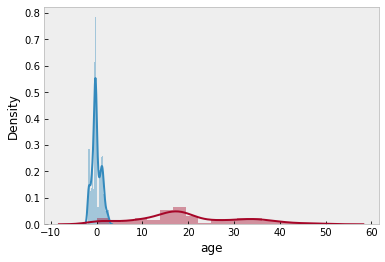

In [43]:
sns_plot = sns.distplot(datos_train_prep["age"])
sns_plot = sns.distplot(datos["age"])

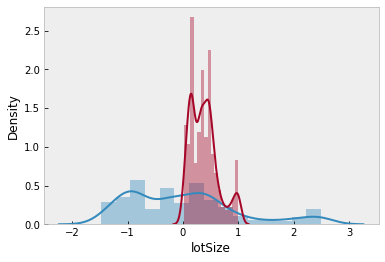

In [44]:
sns_plot = sns.distplot(datos_train_prep["lotSize"])
sns_plot = sns.distplot(datos["lotSize"])

In [45]:

corr_num = datos_train_prep.loc[:,["lotSize", "age", "landValue", "rooms", "newConstruction_Yes", "centralAir_Yes"]]
corr_num = corr_num.iloc[:,]
for i in corr_num.columns:
    x = corr_num[i]
    y = y_train
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x + intercept

   
    trace0 = go.Scatter(
                  x = x,
                  y = y,
                  mode = "markers",
                  marker = dict(color = "red"),
                  name ="Data"
                  )
    
    
    trace1 = go.Scatter(
                  x = x,
                  y = line,
                  mode="lines",
                  marker = dict(color = "black"),
                  name="Fit"
                  )

    
    title = "{} vs Precio (r: {:0.4f}, p: {})".format(corr_num[i].name, r_value, p_value)
    layout = go.Layout(
            title = title, yaxis = dict(title = "Precio"))

    data = [trace0, trace1]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

In [46]:
datos_train_prep.head(3)

,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating_electric,...,fuel_oil,sewer_none,sewer_public/commercial,sewer_septic,waterfront_No,waterfront_Yes,newConstruction_No,newConstruction_Yes,centralAir_No,centralAir_Yes
0,2.330838,2.183294,-1.078443,-0.483150,0.613294,-0.089567,-1.123624,-1.466271,-0.801613,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.276859,-0.109681,-0.478712,-0.307941,0.805875,-0.089567,-1.123624,-0.608760,-1.270127,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.475149,-1.167977,-1.047288,1.714010,0.517003,1.177737,0.806078,1.106261,0.603928,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [47]:
datos_train_prep.shape

(948, 24)

In [48]:
y_train.shape

(948,)

In [49]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

pipe = Pipeline([("preprocessing", preprocessor),
                 ("modelo", Ridge())])

_ = pipe.fit(X=X_train, y=y_train)

In [50]:

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = "neg_root_mean_squared_error",
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-41218.47996057 -40967.31116982 -39539.76098908 -41360.59005655
 -38000.71257097]
Média métricas de validación cruzada: -40217.37094939844


In [51]:
predicciones = pipe.predict(X_test)

In [52]:
# predicciones y el valor real
df_predicciones = pd.DataFrame({"precio" : y_test, "prediccion" : predicciones})
df_predicciones.head()

,precio,prediccion
648,220300,236022.394985
1176,300000,265951.081754
175,172700,184629.718648
917,230000,206507.342040
483,92509,121920.803615


In [53]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

41342.2375871409

In [54]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

param_distributions = {"modelo__alpha": np.logspace(-5, 5, 500)}

grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = "neg_root_mean_squared_error",
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)


resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = "(param.*|mean_t|std_t)")\
    .drop(columns = "params")\
    .sort_values("mean_test_score", ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
11,1.952456,-39952.672495,2939.650863,-38966.942673,711.63484


In [55]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 41397.083921288606


In [56]:
from sklearn.neighbors import KNeighborsRegressor


pipe = Pipeline([("preprocessing", preprocessor),
                 ("modelo", KNeighborsRegressor())])


param_distributions = {"modelo__n_neighbors": np.linspace(1, 100, 500, dtype=int)}


grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = "neg_root_mean_squared_error",
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = "(param.*|mean_t|std_t)")\
    .drop(columns = "params")\
    .sort_values("mean_test_score", ascending = False)\
    .head(1)

,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
5,26,-40718.937238,2048.327402,-39045.089445,628.292718


In [57]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print(f"El error (rmse) de test es: {rmse_knn}")

El error (rmse) de test es: 43279.381830236525


In [58]:
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline([("preprocessing", preprocessor),
                 ("modelo", RandomForestRegressor())])

param_distributions = {
    "modelo__n_estimators": [50, 100, 1000, 2000],
    "modelo__max_features": ["auto", 3, 5, 7],
    "modelo__max_depth"   : [None, 3, 5, 10, 20]
}


grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = "neg_root_mean_squared_error",
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)


resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = "(param.*|mean_t|std_t)")\
    .drop(columns = "params")\
    .sort_values("mean_test_score", ascending = False)\
    .head(1)

,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
15,2000,7,20,-37222.21934,1796.345442,-13626.642807,196.816051


In [59]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 38914.42445201298


In [60]:
from sklearn.ensemble import GradientBoostingRegressor


pipe = Pipeline([("preprocessing", preprocessor),
                 ("modelo", GradientBoostingRegressor())])


param_distributions = {
    "modelo__n_estimators": [50, 100, 1000, 2000],
    "modelo__max_features": ["auto", 3, 5, 7],
    "modelo__max_depth"   : [None, 3, 5, 10, 20],
    "modelo__subsample"   : [0.5,0.7, 1]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = "neg_root_mean_squared_error",
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)


resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = "(param.*|mean_t|std_t)")\
    .drop(columns = "params")\
    .sort_values("mean_test_score", ascending = False)\
    .head(1)

,param_modelo__subsample,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
15,1,100,auto,3,-36534.380969,2574.191368,-25914.915988,433.892074


In [61]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_gbm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_gbm}")

El error (rmse) de test es: 37701.83876410011


In [62]:
from sklearn.ensemble import StackingRegressor


pipe_ridge = Pipeline([("preprocessing", preprocessor),
                     ("ridge", Ridge(alpha=3.4))])

pipe_rf = Pipeline([("preprocessing", preprocessor),
                     ("random_forest", RandomForestRegressor(
                                         n_estimators = 1000,
                                         max_features = 7,
                                         max_depth    = 20
                                        )
                     )])

In [63]:
estimators = [("ridge", pipe_ridge),
              ("random_forest", pipe_rf)]

stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

_ = stacking_regressor.fit(X = X_train, y = y_train)

In [64]:
modelo_final = stacking_regressor
predicciones = modelo_final.predict(X = X_test)
rmse_stacking = mean_squared_error(
                    y_true  = y_test,
                    y_pred  = predicciones,
                    squared = False
                  )
print(f"El error (rmse) de test es: {rmse_stacking}")

El error (rmse) de test es: 38814.38179228106


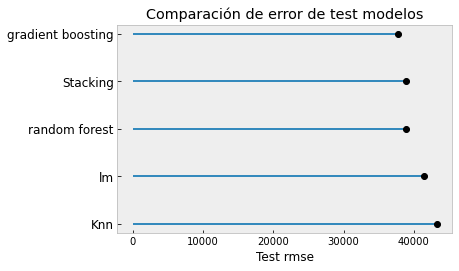

In [65]:
error_modelos = pd.DataFrame({
                        "modelo": ["lm", "random forest", "gradient boosting", "Knn", "Stacking"],
                        "rmse": [rmse_lm, rmse_rf, rmse_gbm, rmse_knn, rmse_stacking]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color="black")
ax.tick_params(axis='y', which="major", labelsize=12)
ax.set_title("Comparación de error de test modelos"),
ax.set_xlabel("Test rmse");